<h3>LAB 2 HEART DISEASE ANALYSIS</h3>


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import os
import warnings
warnings.filterwarnings('ignore')



<p>Reading the heart disease dataset:</p>

In [2]:
data=pd.read_csv('heart.csv')

In [3]:
#Renaming columms to a better categorical name
data=data.rename(columns={'age':'Age','sex':'Sex','cp':'Cp','trestbps':'Trestbps','chol':'Chol','fbs':'Fbs','restecg':'Restecg','thalach':'Thalach','exang':'Exang','oldpeak':'Oldpeak','slope':'Slope','ca':'Ca','thal':'Thal','target':'Target'})

In [4]:
#Data exploration
data.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')

In [5]:
#Checking data for any null values as means to find data error.
print('Data Sum of Null Values \n')
data.isnull().sum()

Data Sum of Null Values 



Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
Ca          0
Thal        0
Target      0
dtype: int64

<p id='12'><h3>TRAINING, TESTING AND VALIDATION</h3></p>
<p>A variety of of supervised learning techniques are used to evaluate performance. These are logistic regression, support vector machine (SVM), k close neighborhood (kNN), GradientBoostingClassifier and RandomForestClassifier algorithms.To implement this logistic regression algorithm model, we need to separate dependent and independent variables within our data sets. In addition, we created a combination of features between different features to make different experiments. While creating these parameters, the process of finding the best results was made by giving hyper parameter values.</p>

<p>Most of the data are categorized and not categorized properly among certain feature values. Operations have to be made to eliminate these situations using:</p>
<ul>
    <li>Z-score</li>
    <li>Normalization</li>
</ul>

In [6]:
#Let's see how the correlation values between them
data.corr()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target
Age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
Sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
Cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
Trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
Chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
Fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
Restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
Thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
Exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
Oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [7]:
#remove target property with the aim here is to normalize the smallest value to 0 and the maximum value to 1, and all other data is a value between 0-1. 
dataX=data.drop('Target',axis=1)
dataY=data['Target']

In [8]:
#TRAINING AND TESTING
X_train,X_test,y_train,y_test=train_test_split(dataX,dataY,test_size=0.2,random_state=42)

In [9]:
#PRINT SHAPE OF TRAIN AND TEST
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (242, 13)
X_test (61, 13)
y_train (242,)
y_test (61,)


In [10]:
#Normalization data
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

<p>Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.</p>

In [11]:
from sklearn.decomposition import PCA
pca=PCA().fit(X_train)
print(pca.explained_variance_ratio_)

[0.27173097 0.19243203 0.11711389 0.08507425 0.08130784 0.06387459
 0.05517117 0.03314911 0.03074089 0.02484146 0.01832923 0.01605866
 0.0101759 ]


<p>A DataFrame of the reduced data with two dimensions can be shown below:</p>

In [12]:
pca = PCA(n_components=8)
pca.fit(X_test)
reduced_data_test = pca.transform(X_test)
pca.fit(X_train)
reduced_data_train = pca.transform(X_train)
reduced_data_train = pd.DataFrame(reduced_data_train, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
reduced_data_test = pd.DataFrame(reduced_data_test, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
X_train=reduced_data_train
X_test=reduced_data_test

In [13]:
def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def plot_feature_importances(gbm):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), gbm.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [14]:
combine_features_list=[
    ('Dim1','Dim2','Dim3'),
    ('Dim4','Dim5','Dim5','Dim6'),
    ('Dim7','Dim8','Dim1'),
    ('Dim4','Dim8','Dim5')
]

<p id='13'><h1>Logistic Regression</h1></p>
<p>Hyperthermatic technique was used to attune the parameters to use our data more effectively. This technique is used to express different features in the process.</p>

In [15]:
#Setting parameters and cross-validation score
parameters=[
{
    'penalty':['l1','l2'],
    'C':[0.1,0.4,0.5],
    'random_state':[0]
    },
]

for features in combine_features_list:
    print(features)
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
    
    gslog=GridSearchCV(LogisticRegression(),parameters,scoring='accuracy')
    gslog.fit(X_train_set,y_train)
    print('Best Parameters:')
    print(gslog.best_params_)
    print()
    predictions=[
    (gslog.predict(X_train_set),y_train,'Train'),
    (gslog.predict(X_test_set),y_test,'Test'),
    ]
    
    for pred in predictions:
        print(' Classification Report: ' + pred[2])
        print("*"*50)
        print(classification_report(pred[1],pred[0]))
        print("*"*50)
        print(' Confusion Matrix:' + pred[2])
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)

    print("*"*50)    
    cvs=cross_val_score(estimator=LogisticRegression(),X=X_train,y=y_train,cv=12)
    print("Mean of cross validation", cvs.mean())
    print("Standard deviation of cross validation", cvs.std())
    print("*"*50) 
   

('Dim1', 'Dim2', 'Dim3')
**************************************************
Best Parameters:
{'C': 0.4, 'penalty': 'l1', 'random_state': 0}

 Classification Report: Train
**************************************************
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       109
           1       0.75      0.85      0.80       133

   micro avg       0.76      0.76      0.76       242
   macro avg       0.76      0.75      0.75       242
weighted avg       0.76      0.76      0.76       242

**************************************************
 Confusion Matrix:Train
[[ 71  38]
 [ 20 113]]
**************************************************
 Classification Report: Test
**************************************************
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.80      0.88      0.84        32

   micro avg       0.82      0.82      0.82        61
   m

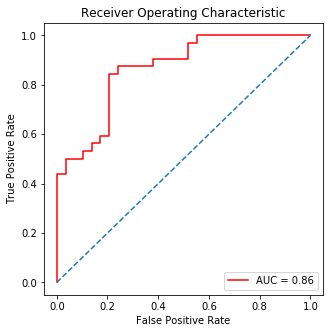

Accuracy : 80.32786885245902 %

[[23  6]
 [ 6 26]]


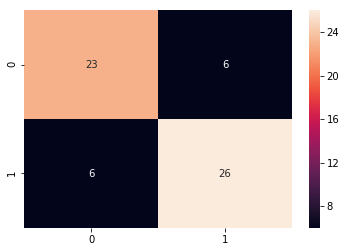

In [16]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=0.1,penalty='l1',random_state=0)
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)


y_proba=lr.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)


from sklearn.metrics import r2_score,accuracy_score

#print Accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy :', acc * 100, '%')

print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

<p id='14'> <h1>K-Nearest Neighbors</h1></p>

In [17]:
parameters=[
{
    'n_neighbors':np.arange(2,33),
    'n_jobs':[2,6]
    },
]
print("*"*50)
for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
   
    gsknn=GridSearchCV(KNeighborsClassifier(),parameters,scoring='accuracy')
    gsknn.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gsknn.best_params_)
    print("*"*50)
    predictions = [
    (gsknn.predict(X_train_set), y_train, 'Train'),
    (gsknn.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    cvs=cross_val_score(estimator=KNeighborsClassifier(),X=X_train,y=y_train,cv=12)
    print(cvs.mean())
    print(cvs.std())
    print("*"*50)

**************************************************
**************************************************
Best parameters set:
{'n_jobs': 2, 'n_neighbors': 29}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       109
           1       0.78      0.83      0.81       133

   micro avg       0.78      0.78      0.78       242
   macro avg       0.78      0.78      0.78       242
weighted avg       0.78      0.78      0.78       242

**************************************************
Train Confusion Matrix:
[[ 78  31]
 [ 22 111]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.83      0.69      0.75        29
           1       0.76      0.88      0.81     

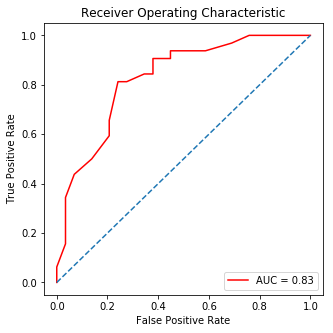

Accuracy : 73.77049180327869 %
[[18 11]
 [ 5 27]]


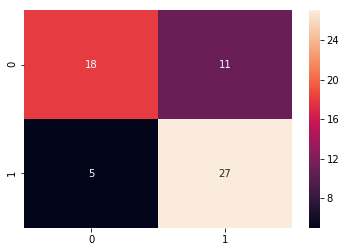

In [18]:
knn=KNeighborsClassifier(n_jobs=2, n_neighbors=22)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

y_proba=knn.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

#print Accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy :', acc * 100, '%')
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

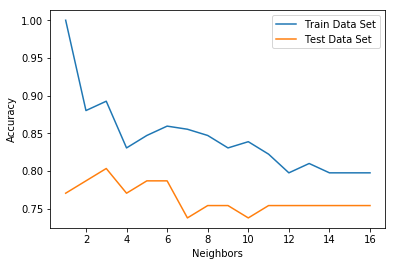

In [19]:
n_neighbors = range(1, 17)
train_data_accuracy = []
test1_data_accuracy = []
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    knn.fit(X_train, y_train)
    train_data_accuracy.append(knn.score(X_train, y_train))
    test1_data_accuracy.append(knn.score(X_test, y_test))
plt.plot(n_neighbors, train_data_accuracy, label="Train Data Set")
plt.plot(n_neighbors, test1_data_accuracy, label="Test Data Set")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()

In [20]:
n_neighbors = range(1, 17)
k_scores=[]
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    scores=cross_val_score(estimator=knn,X=X_train,y=y_train,cv=12)
    k_scores.append(scores.mean())
print(k_scores)

[0.7450757575757575, 0.7492424242424242, 0.7863636363636365, 0.7738636363636363, 0.8068181818181818, 0.8151515151515151, 0.7897727272727274, 0.7814393939393941, 0.7852272727272728, 0.7727272727272726, 0.7810606060606061, 0.7810606060606061, 0.7852272727272727, 0.7727272727272726, 0.7935606060606061, 0.7810606060606061]


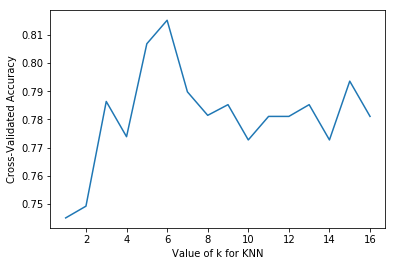

Maximum KNN Score is 81.52%


In [21]:
plt.plot(n_neighbors,k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel("Cross-Validated Accuracy")
plt.show()

print("Maximum KNN Score is {:.2f}%".format((max(k_scores))*100))

<p id='15'><h1>Naive Bayes Algorithm</h1></p>

In [22]:
parameters = [
    {
        'kernel': ['linear'],
        'random_state': [2]
    },
    {
        'kernel': ['rbf'],
        'gamma':[0.9,0.06,0.3],
        'random_state': [0],
        'C':[1,2,3,4,5,6],
        'degree':[2],
        'probability':[True]
    },
]

for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
  
    svc = GridSearchCV(SVC(), parameters,
    scoring='accuracy')
    svc.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(svc.best_params_)
    print("*"*50)
    predictions = [
    (svc.predict(X_train_set), y_train, 'Train'),
    (svc.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    cvs=cross_val_score(estimator=SVC(),X=X_train,y=y_train,cv=4)
    print(cvs.mean())
    print(cvs.std())
    print("*"*50)

**************************************************
Best parameters set:
{'C': 5, 'degree': 2, 'gamma': 0.9, 'kernel': 'rbf', 'probability': True, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       109
           1       0.80      0.81      0.81       133

   micro avg       0.79      0.79      0.79       242
   macro avg       0.78      0.78      0.78       242
weighted avg       0.78      0.79      0.78       242

**************************************************
Train Confusion Matrix:
[[ 82  27]
 [ 25 108]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.73      0.66      0.69        29
           1       0.71      0.78      

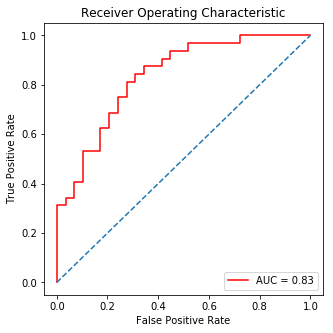

Accuracy : 77.04918032786885 %

[[20  9]
 [ 5 27]]


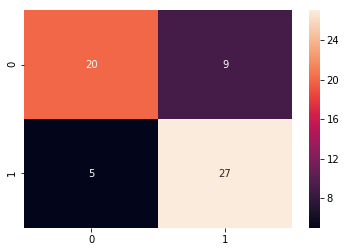

In [23]:
svc=SVC(C=5,degree=2,gamma=0.06,kernel='rbf',probability=True,random_state=0)
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

y_proba=svc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score


#print Accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy :', acc * 100, '%')

print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

<p id='16'><h1>Gradient Boosting Machine</h1></p>

In [24]:
parameters = [
{
    'learning_rate': [0.01, 0.02, 0.002],
    'random_state': [0],
    'n_estimators': np.arange(3, 20)
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
   
    gbc = GridSearchCV(GradientBoostingClassifier(), parameters, scoring='accuracy')
    gbc.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(gbc.best_params_)
    print("*"*50)
    predictions = [
    (gbc.predict(X_train_set), y_train, 'Train'),
    (gbc.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    cvs=cross_val_score(estimator=GradientBoostingClassifier(),X=X_train,y=y_train,cv=4)
    print(cvs.mean())
    print(cvs.std())
    print("*"*50)

**************************************************
Best parameters set:
{'learning_rate': 0.02, 'n_estimators': 12, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.96      0.50      0.66       109
           1       0.71      0.98      0.82       133

   micro avg       0.77      0.77      0.77       242
   macro avg       0.84      0.74      0.74       242
weighted avg       0.82      0.77      0.75       242

**************************************************
Train Confusion Matrix:
[[ 55  54]
 [  2 131]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.93      0.48      0.64        29
           1       0.67      0.97      0.79        32

   micro avg  

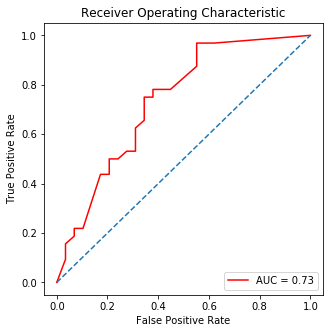

Accuracy : 65.57377049180327 %

[[19 10]
 [11 21]]


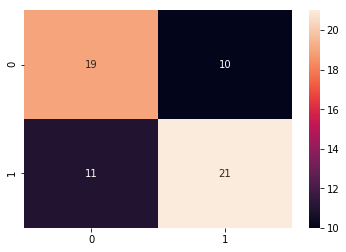

In [25]:
gbc=GradientBoostingClassifier(learning_rate=0.02,n_estimators=18,random_state=0)
gbc.fit(X_train,y_train)

y_pred=gbc.predict(X_test)

y_proba=gbc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

#print Accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy :', acc * 100, '%')
print()

from sklearn.metrics import r2_score,accuracy_score


cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

<p id='17'> <h1>Random Forest</h1></p>	

In [26]:
parameters = [
    {
        'max_depth': np.arange(1, 10),
        'min_samples_split': np.arange(2, 5),
        'random_state': [3],
        'n_estimators': np.arange(10, 20)
    },
]

for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    tree=GridSearchCV(RandomForestClassifier(),parameters,scoring='accuracy')
    tree.fit(X_train_set, y_train)
    
    print('Best parameters set:')
    print(tree.best_params_)
    print("*"*50)
    predictions = [
        (tree.predict(X_train_set), y_train, 'Train'),
        (tree.predict(X_test1_set), y_test, 'Test1')
    ]
    
    for pred in predictions:
        
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
    
    
    print("*"*50)    
    cvs=cross_val_score(estimator=RandomForestClassifier(),X=X_train,y=y_train,cv=4)
    print(cvs.mean())
    print(cvs.std())
    print("*"*50)

**************************************************
Best parameters set:
{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 11, 'random_state': 3}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       109
           1       0.77      0.84      0.81       133

   micro avg       0.78      0.78      0.78       242
   macro avg       0.78      0.77      0.77       242
weighted avg       0.78      0.78      0.78       242

**************************************************
Train Confusion Matrix:
[[ 76  33]
 [ 21 112]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.74      0.69      0.71        29
           1       0.74      0.78      0.76        3

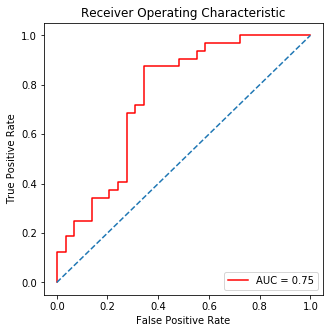

Accuracy : 75.40983606557377 %

[[19 10]
 [ 5 27]]


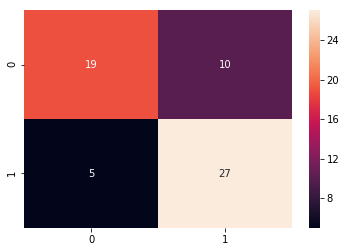

In [27]:
rfc=RandomForestClassifier(max_depth=7,min_samples_split=4,n_estimators=19,random_state=3)
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

y_proba=rfc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score
#print Accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy :', acc * 100, '%')
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [28]:
for i in range(1,11):
    rf = RandomForestClassifier(n_estimators=i, random_state = 3, max_depth=7)
    rf.fit(X_train, y_train)
    print("TEST set score w/ " +str(i)+" estimators: {:.5}".format(rf.score(X_test, y_test)))

TEST set score w/ 1 estimators: 0.60656
TEST set score w/ 2 estimators: 0.63934
TEST set score w/ 3 estimators: 0.59016
TEST set score w/ 4 estimators: 0.63934
TEST set score w/ 5 estimators: 0.59016
TEST set score w/ 6 estimators: 0.60656
TEST set score w/ 7 estimators: 0.62295
TEST set score w/ 8 estimators: 0.63934
TEST set score w/ 9 estimators: 0.62295
TEST set score w/ 10 estimators: 0.57377


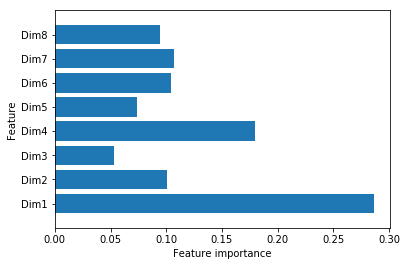

In [29]:
plot_feature_importances(rf)
plt.show()

<p id='18'><h1>Decision Tree</h1>	</p>

In [51]:
parameters = [
{
    'random_state': [42],
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    dtr = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='accuracy')
    
    dtr.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(dtr.best_params_)
    print("*"*50)
    predictions = [
    (dtr.predict(X_train_set), y_train, 'Train'),
    (dtr.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    cvs=cross_val_score(estimator=DecisionTreeClassifier(),X=X_train,y=y_train,cv=4)
    print(cvs.mean())
    print(cvs.std())
    print("*"*50)  
print()


from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_set, y_train)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(X_test1_set, y_test)*100))


**************************************************
Best parameters set:
{'random_state': 42}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       133

   micro avg       1.00      1.00      1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

**************************************************
Train Confusion Matrix:
[[109   0]
 [  0 133]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.83      0.52      0.64        29
           1       0.67      0.91      0.77        32

   micro avg       0.72      0.72      0.72        61
  

<p id='19'><h1>Kernelized SVM</h1></p>

In [47]:
parameters = [
{
    'random_state': [42],
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    dtr = GridSearchCV(SVC(), parameters, scoring='accuracy')
    
    dtr.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(dtr.best_params_)
    print("*"*50)
    predictions = [
    (dtr.predict(X_train_set), y_train, 'Train'),
    (dtr.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    cvs=cross_val_score(estimator=SVC(),X=X_train,y=y_train,cv=4)
    print(cvs.mean())
    print(cvs.std())
    print("*"*50)  
    
print("SVM Test Accuracy {:.2f}%".format(dtr.score(X_test1_set, y_test)*100))

**************************************************
Best parameters set:
{'random_state': 42}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.80      0.58      0.67       109
           1       0.72      0.88      0.79       133

   micro avg       0.74      0.74      0.74       242
   macro avg       0.76      0.73      0.73       242
weighted avg       0.75      0.74      0.74       242

**************************************************
Train Confusion Matrix:
[[ 63  46]
 [ 16 117]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.73      0.66      0.69        29
           1       0.71      0.78      0.75        32

   micro avg       0.72      0.72      0.72        61
  

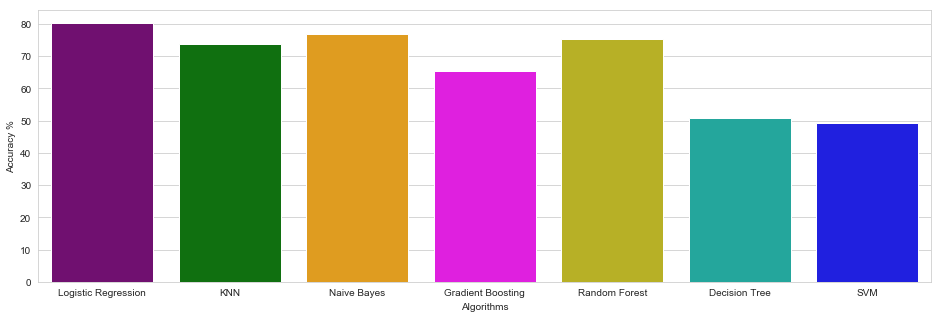

In [53]:
### Compare models accuracy
methods = ["Logistic Regression", "KNN", "Naive Bayes", "Gradient Boosting", "Random Forest", "Decision Tree", "SVM"]
accuracy = [80.33, 73.77, 77.05, 65.57, 75.41, 50.82, 49.18]
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE","blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()